### Домашняя работа №1.2 (проверка статистистических гипотез)

D Данной работе используется ыборка, собранная в ходе проведения A/B тестирования в мобильной игре Cookie Cats. 

В данной игре устанавливается временное ограничение на число уровней, которые игрок может пройти подряд. Первое такое ограничение находится на 30 уровне, то есть, после прохождения первых 30 уровней игры, игроку необходимо подождать некоторое время или заплатить деньги, чтобы продолжить играть. В тестировании первое ограничение было смещено на 40 уровень для некоторых игроков. 

Выборка содержит данные для 90189 игроков. Для каждого игрока указана версия игры (version) принимающая значения gate_30 и gate_40 соответственно для разных уровней ограничений. Также присутствует колонка sum_gamerounds содержащая общее число игровых раундов для игрока в первые 7 дней после установки. Таким образом, необходимо понять, повлияло ли смещение первого ограничения на заинтересованность игрой. Заинтересованность будем измерять по параметру sum_gamerounds, то есть числу игровых раундов в первые 7 дней. Данную задачу можно свести к проверке гипотезы об однородности двух выборок, где первая выборка содержит число игровых раундов для каждого игрока в стандартной версии игры с ограничением на 30 уровне, а вторая выборка — число игровых раундов для игроков в версии с ограничением на 40 уровне.

### Условия

Можно использовать pandas, numpy, matplotlib/seaborn, и scipy.

### Задачи

1. Проанализировать данные - вывести размеры двух групп, их средние число сыгранных раундов и тд. - 3 балла
2. Визуализировать данные - вывести гистограммы и box-plot, проанализировать выбросы - 3 балла
3. Оценить стат. значимость различия в выборках с помощью минимум 2 критериев на выбор - 4 балла

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [169]:
cookie_cats = pd.read_csv('cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [170]:
gate_30 = cookie_cats['sum_gamerounds'][cookie_cats['version'] == 'gate_30']
cookie_cats['sum_gamerounds'][cookie_cats['version'] == 'gate_30'].describe()

count    44700.000000
mean        52.456264
std        256.716423
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [171]:
gate_40 = cookie_cats['sum_gamerounds'][cookie_cats['version'] == 'gate_40']
cookie_cats['sum_gamerounds'][cookie_cats['version'] == 'gate_40'].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

Как можно видеть максимум по выборке в данных с первым ограничением почти в 20 раз больше, чем во втором. Из-за этого можно пронаблюдать значительную разницу в стандартном отклонении. Следовательно от этого максимума можно избавиться.

In [377]:
gate_30_dropmax = gate_30.drop(gate_30.index[gate_30 == gate_30.max()], axis=0)
gate_30_dropmax.describe()

count    44699.000000
mean        51.342111
std        102.057598
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

<Axes: xlabel='sum_gamerounds', ylabel='Count'>

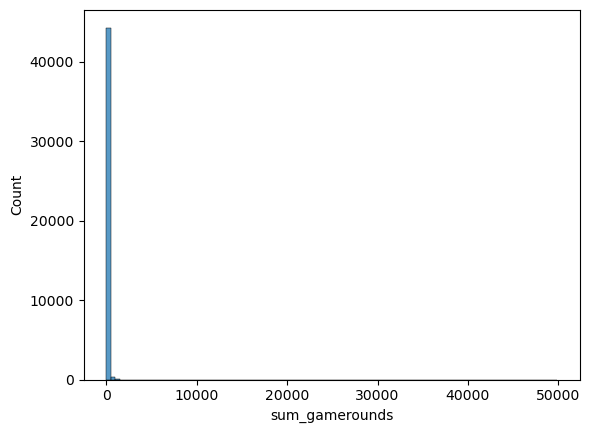

In [379]:
sns.histplot(gate_30, bins=100)

<Axes: xlabel='sum_gamerounds', ylabel='Count'>

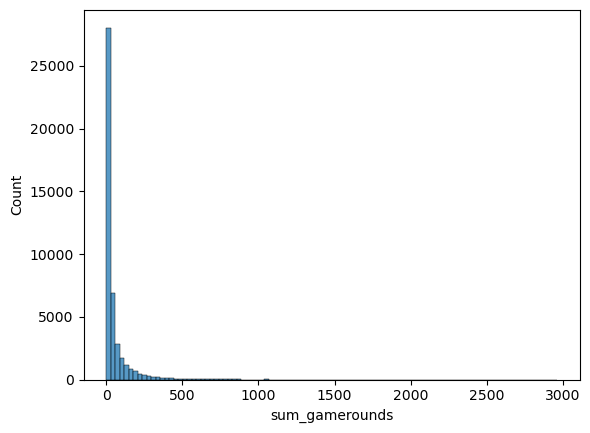

In [381]:
sns.histplot(gate_30_dropmax, bins=100)

<Axes: xlabel='sum_gamerounds', ylabel='Count'>

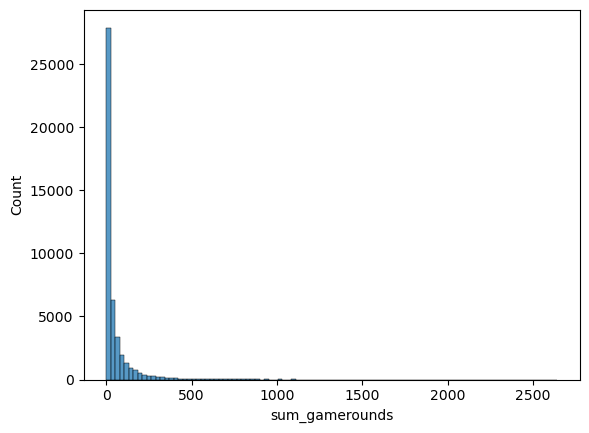

In [383]:
sns.histplot(gate_40, bins=100)

Распределения на вид достаточно схожи.

<Axes: ylabel='sum_gamerounds'>

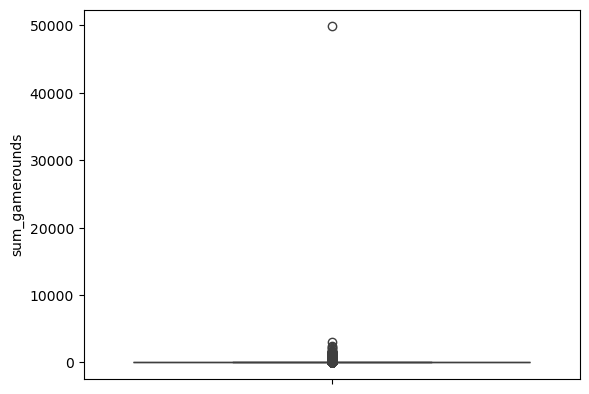

In [386]:
sns.boxplot(gate_30)

<Axes: ylabel='sum_gamerounds'>

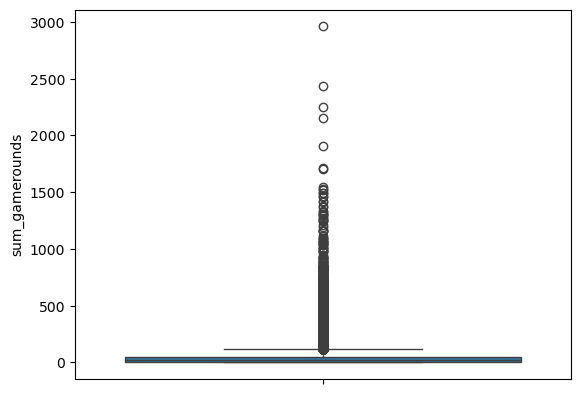

In [388]:
sns.boxplot(gate_30_dropmax)

<Axes: ylabel='sum_gamerounds'>

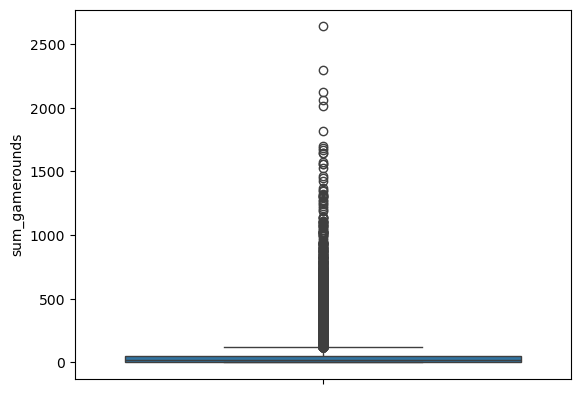

In [390]:
sns.boxplot(gate_40)

В основном значения расположены у нуля, что для мобильной игры неудивительно.

После удаления максимума в данных с ограничением в 30 уровней стало лучше, но как можно посмотреть на боксплот выбросы все ещё существенно вляют на визуализацию.

In [393]:
stats.kstest(gate_30, gate_40)

KstestResult(statistic=0.010270735856046653, pvalue=0.01707004050286604, statistic_location=22, statistic_sign=-1)

In [395]:
stats.kstest(gate_30_dropmax, gate_40)

KstestResult(statistic=0.010258010418840668, pvalue=0.01727609923280408, statistic_location=22, statistic_sign=-1)

In [397]:
stats.mannwhitneyu(gate_30, gate_40)

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

In [399]:
stats.mannwhitneyu(gate_30_dropmax, gate_40)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

Критерий Колмогорова-Смирнова показывает, что есть различия в выборках. Критерий Манна-Уитни практически находится на эквилибриуме, но все-таки не замечает разницы в выборках. Как можно заметить удаление максимума не сильно влияет на p значение.